In [6]:
## 1, 2, 3, 4의 값을 0.4, 0.3, 0.2, 0.1의 확률로 취하는 X를 1,000개 모의생성하고 빈도분 포를 제시하라

In [1]:
import random
prob = [0.4, 0.3, 0.2, 0.1]

In [3]:
import pandas as pd
outcomes = list(range(1, len(prob)+1))
smaples = random.choices(outcomes, k=1000, weights=prob)
pd.Series(smaples).value_counts().sort_index()

1    405
2    291
3    201
4    103
dtype: int64

In [5]:
import numpy as np 
def rnd(size, prob):
    x = [random.uniform(0,1) for i in range(size)]
    y = [0] * size
    cumulative = list(np.cumsum(prob))
    for i in range(size):
        y[i] = min(j for j,p in enumerate(cumulative) if x[i] < p)
    return y

labels = pd.Series(rnd(size=1000, prob=prob))
labels.value_counts().sort_index()

0    394
1    298
2    204
3    104
dtype: int64

In [8]:
# 누적 분포함수 F(X) = $e^x/(1+e^x), 음의 무한대에서 양의 무한대로 x 범위를 가지는
# 확률 변수 x를 1000개 모의 생성하고 평균 표준 편차 및 히스토그램을 제시하라 
# F(x)의 역함수를 쓰지 않아야함

In [15]:
import numpy as np
from scipy.optimize import root

def F(x):
    return np.exp(x) / (1+np.exp(x))

def H(x, u):
    return F(x) - u

size = 1000
usize = np.random.uniform(size=size)
rnd = np.empty(size)

for i in range(size):
    u = usize[i]
    rnd[i] = root(H, x0 =0, args=(u,)).x[0]

In [17]:
type(rnd)

numpy.ndarray

In [18]:
rnd.mean(), rnd.std()

(0.05327894854749227, 1.9373390187845612)

In [19]:
np.pi/np.sqrt(3)

1.8137993642342178

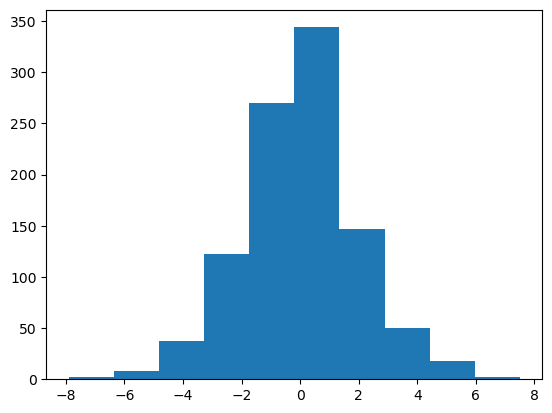

In [20]:
import matplotlib.pyplot as plt
plt.hist(rnd)
plt.show()